In [1]:
# Cell 1: Imports and device setup
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Cell 2: Load MNIST data
transform = transforms.ToTensor()

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.44MB/s]


In [3]:
# Cell 3: Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

mlp_model = MLP().to(device)


In [4]:
# Cell 4: Train MLP
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

for epoch in range(5):
    mlp_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mlp_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")


Epoch 1, Loss: 267.5474
Epoch 2, Loss: 101.7100
Epoch 3, Loss: 67.6199
Epoch 4, Loss: 48.6319
Epoch 5, Loss: 37.0179


In [5]:
# Cell 5: Evaluate MLP
from sklearn.metrics import classification_report

mlp_model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = mlp_model(images)
        preds = torch.argmax(outputs, dim=1).cpu()
        y_pred.extend(preds)
        y_true.extend(labels)

print("MLP Classification Report:\n", classification_report(y_true, y_pred))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.92      0.99      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [6]:
# Cell 6: Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # [B, 32, 28, 28]
            nn.ReLU(),
            nn.MaxPool2d(2),                            # [B, 32, 14, 14]
            nn.Conv2d(32, 64, kernel_size=3, padding=1),# [B, 64, 14, 14]
            nn.ReLU(),
            nn.MaxPool2d(2)                             # [B, 64, 7, 7]
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

cnn_model = CNN().to(device)


In [7]:
# Cell 7: Train CNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

for epoch in range(5):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")


Epoch 1, Loss: 171.6910
Epoch 2, Loss: 49.4127
Epoch 3, Loss: 33.0236
Epoch 4, Loss: 24.5664
Epoch 5, Loss: 19.4794


In [8]:
# Cell 8: Evaluate CNN
cnn_model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = cnn_model(images)
        preds = torch.argmax(outputs, dim=1).cpu()
        y_pred.extend(preds)
        y_true.extend(labels)

print("CNN Classification Report:\n", classification_report(y_true, y_pred))


CNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



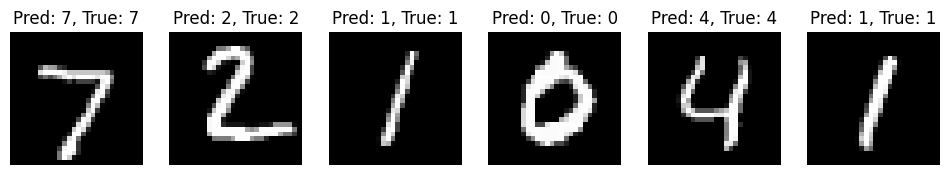

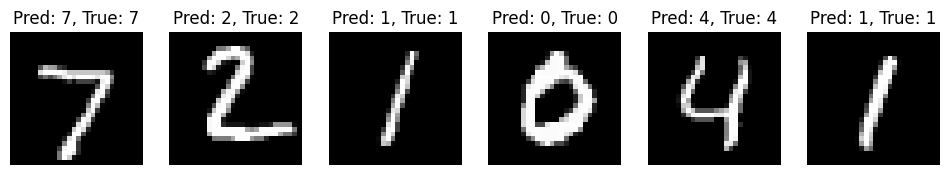

In [10]:
# Cell: Visualize random predictions
import random
import matplotlib.pyplot as plt

def show_predictions(model, loader, n=6):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images[:n], labels[:n]
    outputs = model(images.to(device))
    preds = torch.argmax(outputs, dim=1).cpu()

    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Pred: {preds[i]}, True: {labels[i]}")
        plt.axis('off')
    plt.show()

# Example:
show_predictions(mlp_model, test_loader)
show_predictions(cnn_model, test_loader)


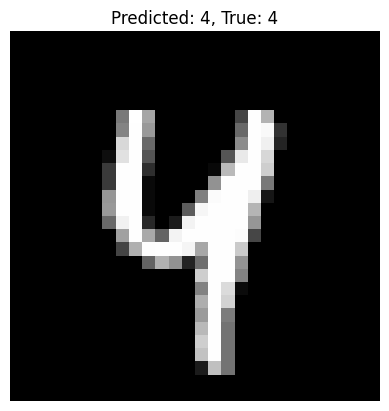

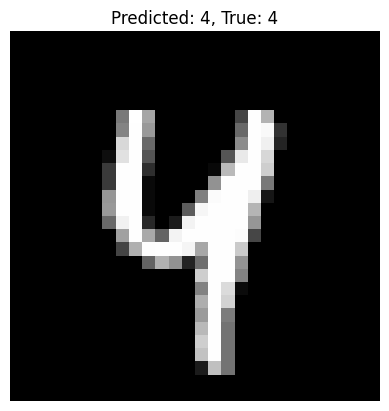

In [11]:
# Cell: Predict a single image
def predict_single(model, image_idx=0):
    model.eval()
    image, label = test_set[image_idx]
    with torch.no_grad():
        output = model(image.unsqueeze(0).to(device))
        pred = torch.argmax(output).item()

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred}, True: {label}")
    plt.axis('off')
    plt.show()

# Example:
predict_single(mlp_model, 42)
predict_single(cnn_model, 42)


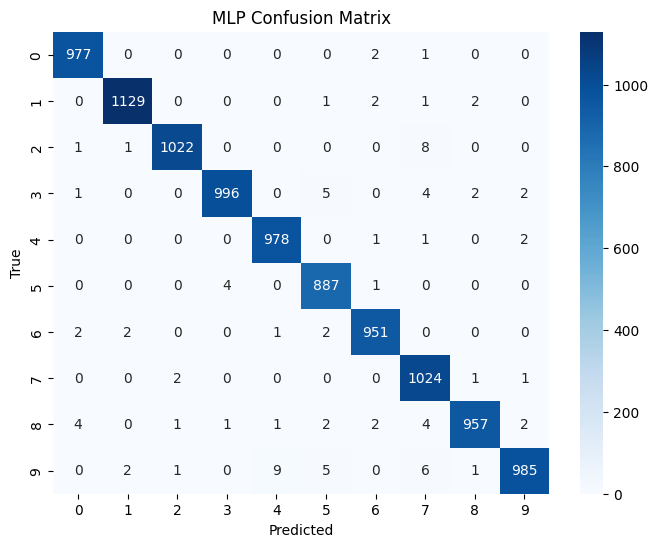

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# After evaluating both:
plot_confusion_matrix(y_true, y_pred, title="MLP Confusion Matrix")